# Feature Engineering 

____
## Engineered Features:
Features are decided upon primarily through domain knowledge and analysis of correlation with label using a pairplot.

|Engineered Features (Datapoint):|Description: |
| -------------                  |---|
|Accuracy                        |Median Accuracy value with respect to range of timeseries data. If Median Accuracy is not available, Min Accuracy value is used instead 
|Bearing_delta                   |Standard Deviation of the difference between each timeseries datapoint
|acceleration_x                  |Number of threshold crossovers with threshold set at 0
|acceleration_y                  |Number of threshold crossovers with threshold set at Mean of acceleration_y
|acceleration_z                  |Number of threshold crossovers with threshold set at Mean of acceleration_z
|gyro_x                          |Max gyro_x value - Min gyro_z value
|gyro_y                          |Max gyro_y value - Min gyro_z value
|gyro_z                          |Max gyro_z value - Min gyro_z value
|Speed                           |Mean of Speed in timeseries data
|missing_rng                     |Number of missing values in the range of timeseries data

In [46]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
import matplotlib.pyplot as plt
from pprint import pprint
sb.set()
from pathlib import Path

In [ ]:
df_features = pd.read_csv('safety/data_cleaned_features.csv')

df_labels = pd.read_csv('safety/data_cleaned_labels.csv')

df_combined = pd.read_csv('safety/data_cleaned_combined.csv')

In [ ]:
df_combined.head()

## Define Functions

In [4]:
# Convert bookingIDs to dataframe
def convert_to_df(ids, dataset):
    return dataset.loc[dataset['bookingID']==ids].reset_index(drop=True)

# create a differenced series
def difference(dataset, interval=1):
    diff = []
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

def graph_bookingID(ID):
    bookingid = df_combined.loc[df_combined['bookingID']==ID]
    label = 'BookingID ' + str(ID) + ' (Label ' + str(bookingid['label'].iloc[0]) + ')'
    bookingid = bookingid.drop(['bookingID'],axis=1)
    print(bookingid.describe())

    accuracy = bookingid.loc[:, ['Accuracy', 'second']]
    bearing = bookingid.loc[:, ['Bearing', 'second']]
    bearing_delta = difference(bearing.values)
    acceleration_all = bookingid.loc[:, ['acceleration_x', 'acceleration_y', 'acceleration_z', 'second']]
    gyro_all = bookingid.loc[:, ['gyro_x', 'gyro_y', 'gyro_z', 'second']]
    speed = bookingid.loc[:, ['Speed', 'second']]
    
    graphs = [accuracy, bearing, acceleration_all, gyro_all, speed]
    f, axes = plt.subplots(len(graphs)+1, 1, figsize=(20,20))
    count=0
    for g in graphs:
        g.plot(x='second', ax=axes[count])
        count +=1
    axes[count].plot(bearing_delta)
    axes[count].legend(['Bearing Delta'])
    axes[0].set_title(label, fontsize=16)

## Getting Bearing difference (Experimentation)

9.901821624279071


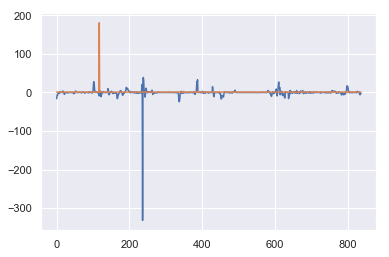

In [5]:
bookingid = df_combined.loc[df_combined['bookingID']==1]
bookingid = bookingid.drop(['bookingID'],axis=1)

bearing = bookingid.loc[:, ['Bearing', 'second']]
X = bearing.values
diff = difference(X)
print(np.std(diff))
plt.plot(diff)
# plt.show()
# print(diff)

In [6]:
print(df_combined.shape)
print(df_combined.dtypes)
df_combined.head()

(15876650, 12)
bookingID           int64
Accuracy          float64
Bearing           float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
Speed             float64
label               int64
dtype: object


,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991,0
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454,0
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454,0
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454,0
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454,0


In [7]:
convert_to_df(0, df_combined).describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
count,1003.0,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.0
mean,0.0,10.127617,176.419864,-0.708812,-9.613829,-1.622308,0.003403,-0.006175,-0.004107,903.231306,9.004787,0.0
std,0.0,3.667800,129.251952,0.925227,0.640254,1.138741,0.065944,0.100259,0.063666,533.929149,7.196581,0.0
min,0.0,4.000000,0.037464,-4.692294,-12.764703,-6.251807,-0.392537,-0.609930,-0.731892,0.000000,0.064309,0.0
25%,0.0,8.000000,38.211140,-1.184251,-9.904376,-2.250594,-0.027035,-0.046184,-0.029853,250.500000,1.601906,0.0
50%,0.0,8.000000,144.299423,-0.724802,-9.623547,-1.608112,0.002603,-0.002345,-0.003478,1087.000000,8.522352,0.0
75%,0.0,12.000000,312.108078,-0.297726,-9.342868,-1.035463,0.033266,0.032592,0.020898,1338.500000,15.647217,0.0
max,0.0,32.000000,359.979767,4.782614,-6.119916,2.318857,0.438371,0.469724,0.372807,1589.000000,22.946083,0.0


In [8]:
print(len(df_combined['bookingID'].unique().tolist()))
df1 = df_combined.dropna()
print(len(df1['bookingID'].unique().tolist()))

19955
19955


In [9]:
print(len(df_labels['bookingID'].unique().tolist()))
df1_labels = df_labels.dropna()
print(len(df1_labels['bookingID'].unique().tolist()))

19955
19955


In [10]:
df_labels[df_labels['label']==0].head()

,bookingID,label
0,0,0
4,6,0
5,7,0
6,8,0
7,10,0


In [11]:
df_labels[df_labels['label']==1].head()

,bookingID,label
1,1,1
2,2,1
3,4,1
12,18,1
23,35,1


## Plotting Graphs for Labels 0 & 1 to analyse features

         Accuracy     Bearing  acceleration_x  acceleration_y  acceleration_z  \
count  646.000000  646.000000      646.000000      646.000000      646.000000   
mean     4.425511  109.501548        1.320747        9.758527        0.054457   
std      1.389848   97.299597        0.863196        0.541352        0.838986   
min      3.000000    0.000000       -5.026627        7.732074       -4.673482   
25%      3.900000    0.000000        0.847847        9.498995       -0.320823   
50%      3.900000  120.000000        1.219247        9.735422        0.131681   
75%      5.934000  179.000000        1.733103       10.027814        0.416292   
max      8.452000  359.000000        6.005855       12.060791        2.409764   

           gyro_x      gyro_y      gyro_z      second       Speed  label  
count  646.000000  646.000000  646.000000  646.000000  646.000000  646.0  
mean     0.007292   -0.004899   -0.003255  329.340557    6.149118    0.0  
std      0.039369    0.110219    0.048597  19

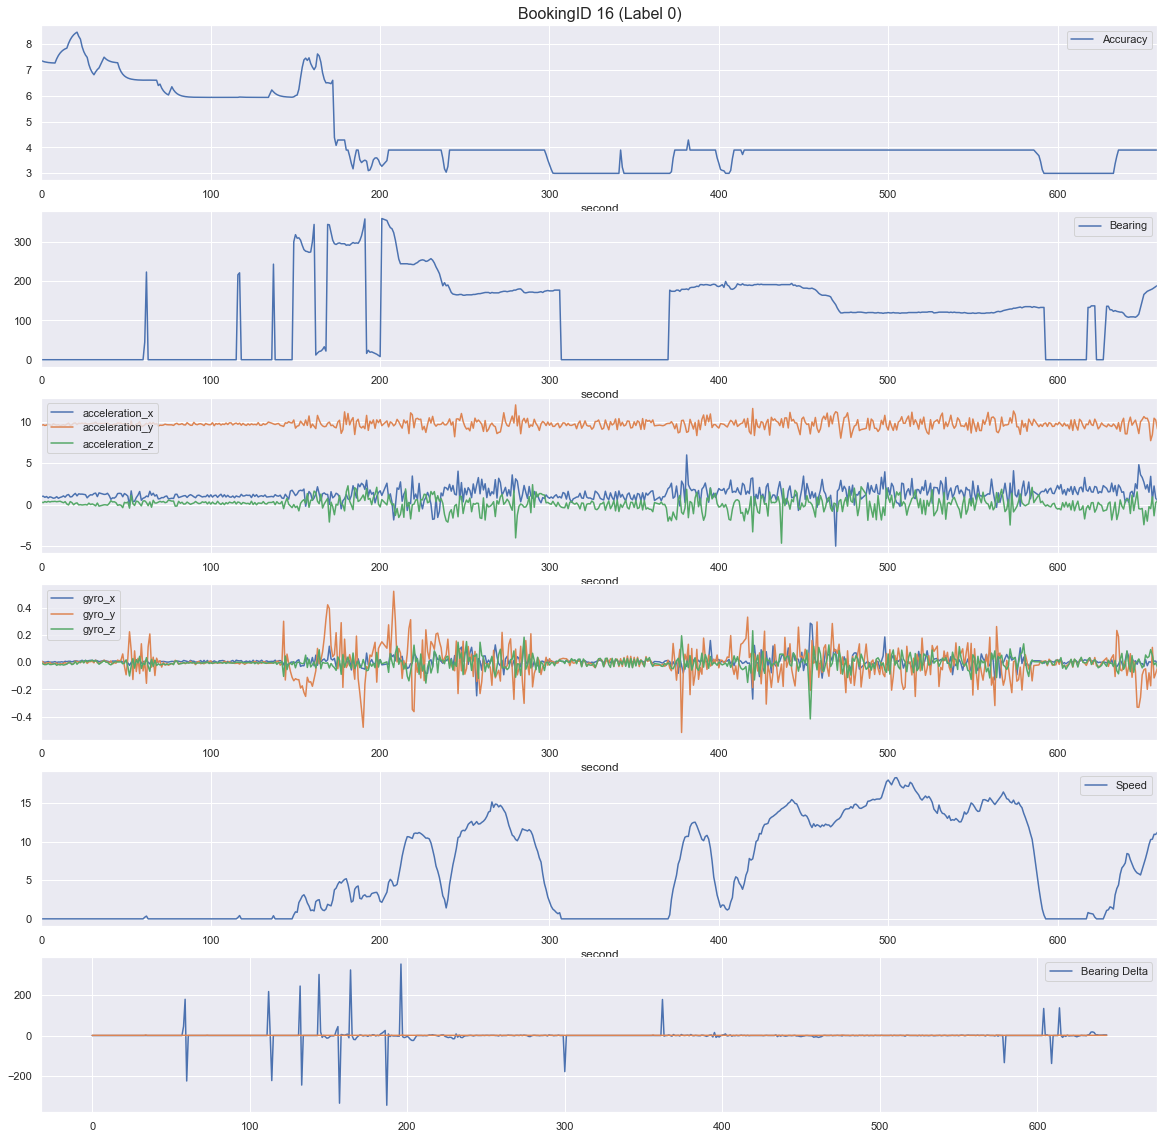

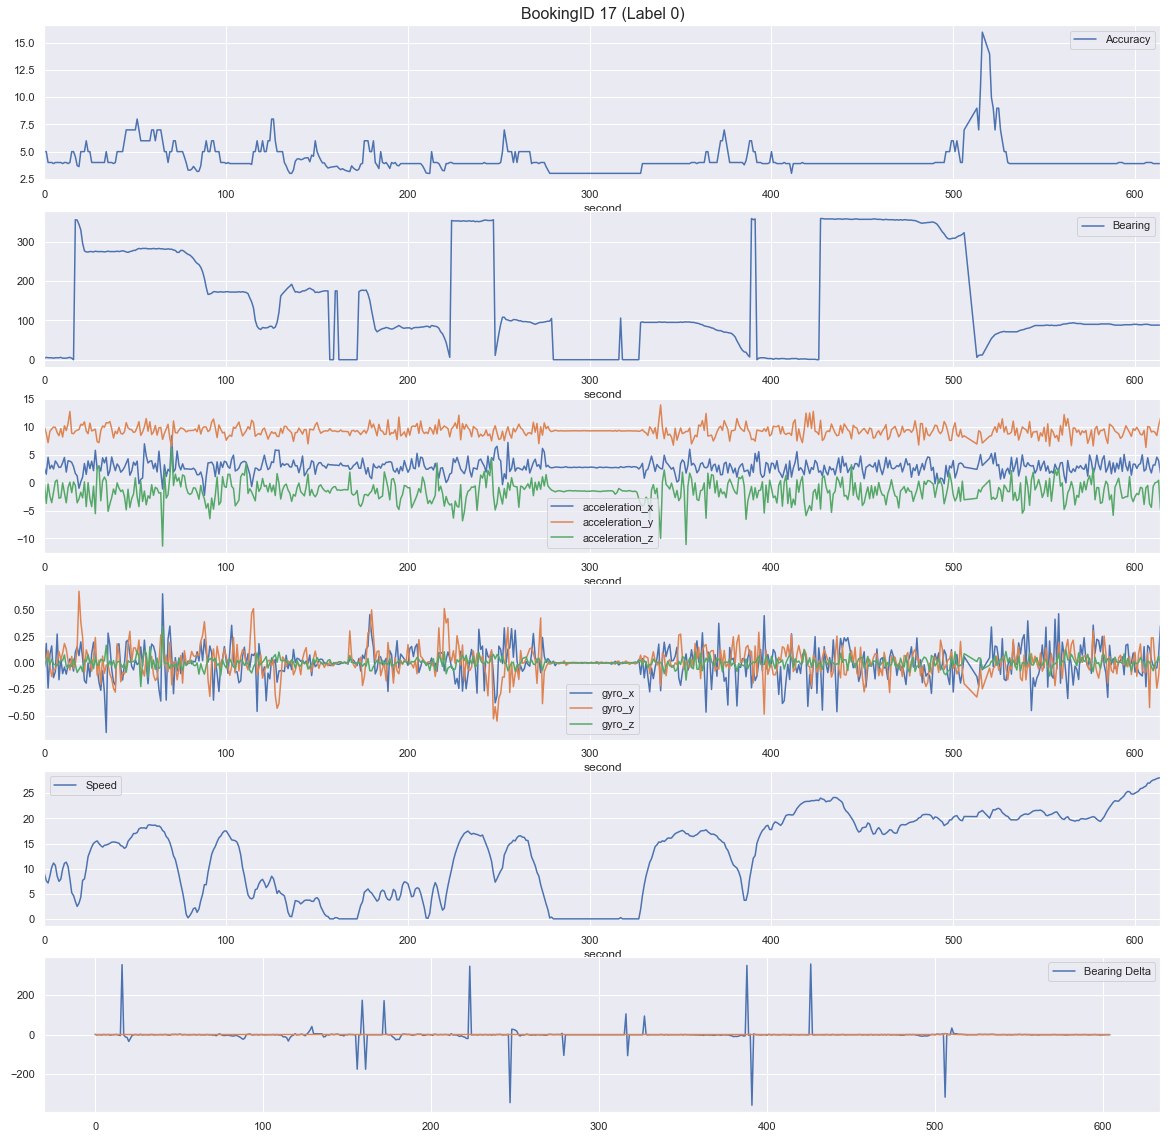

In [12]:
label0 = df_labels[df_labels['label']==0]['bookingID'].tolist() # [0, 6, 7, 8, 10]
for i in label0[7:9]:
    graph_bookingID(i)

       Accuracy      Bearing  acceleration_x  acceleration_y  acceleration_z  \
count    1094.0  1094.000000     1094.000000     1094.000000     1094.000000   
mean       10.0   151.807013       -0.365117       -9.406439       -2.613639   
std         0.0    71.273774        0.527220        0.598023        0.779529   
min        10.0     2.271227       -2.866458      -18.847833       -9.374869   
25%        10.0   103.085045       -0.566518       -9.603696       -3.042537   
50%        10.0   134.210114       -0.381168       -9.364999       -2.608658   
75%        10.0   197.172825       -0.148863       -9.178528       -2.217808   
max        10.0   353.855377        2.019635       -7.064984        0.296381   

            gyro_x       gyro_y       gyro_z       second        Speed   label  
count  1094.000000  1094.000000  1094.000000  1094.000000  1094.000000  1094.0  
mean     -0.022884     0.023232    -0.000376   547.495430     6.150996     1.0  
std       0.042342     0.112567     

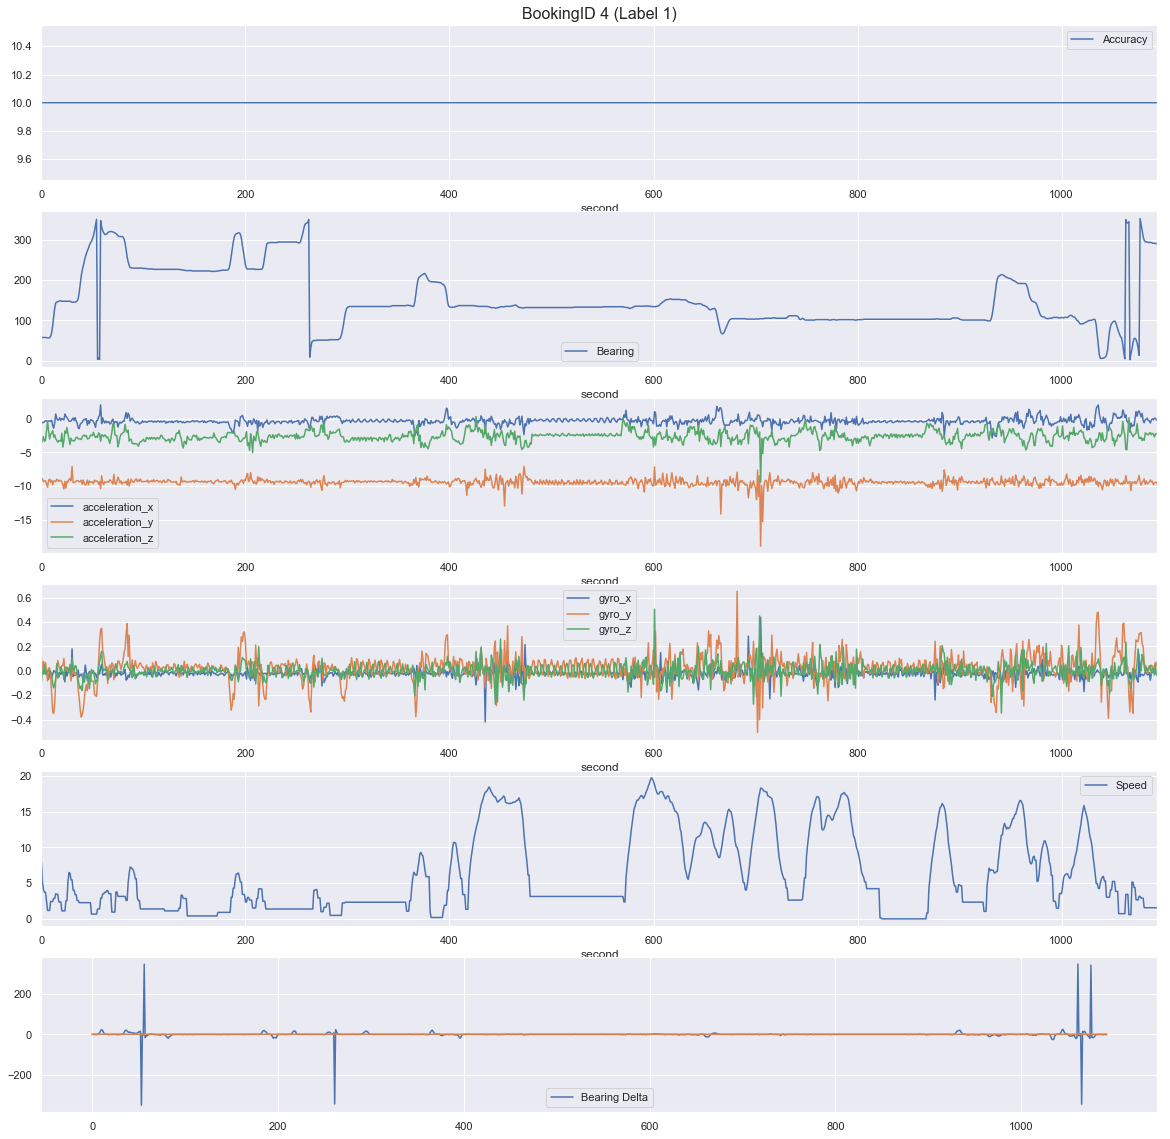

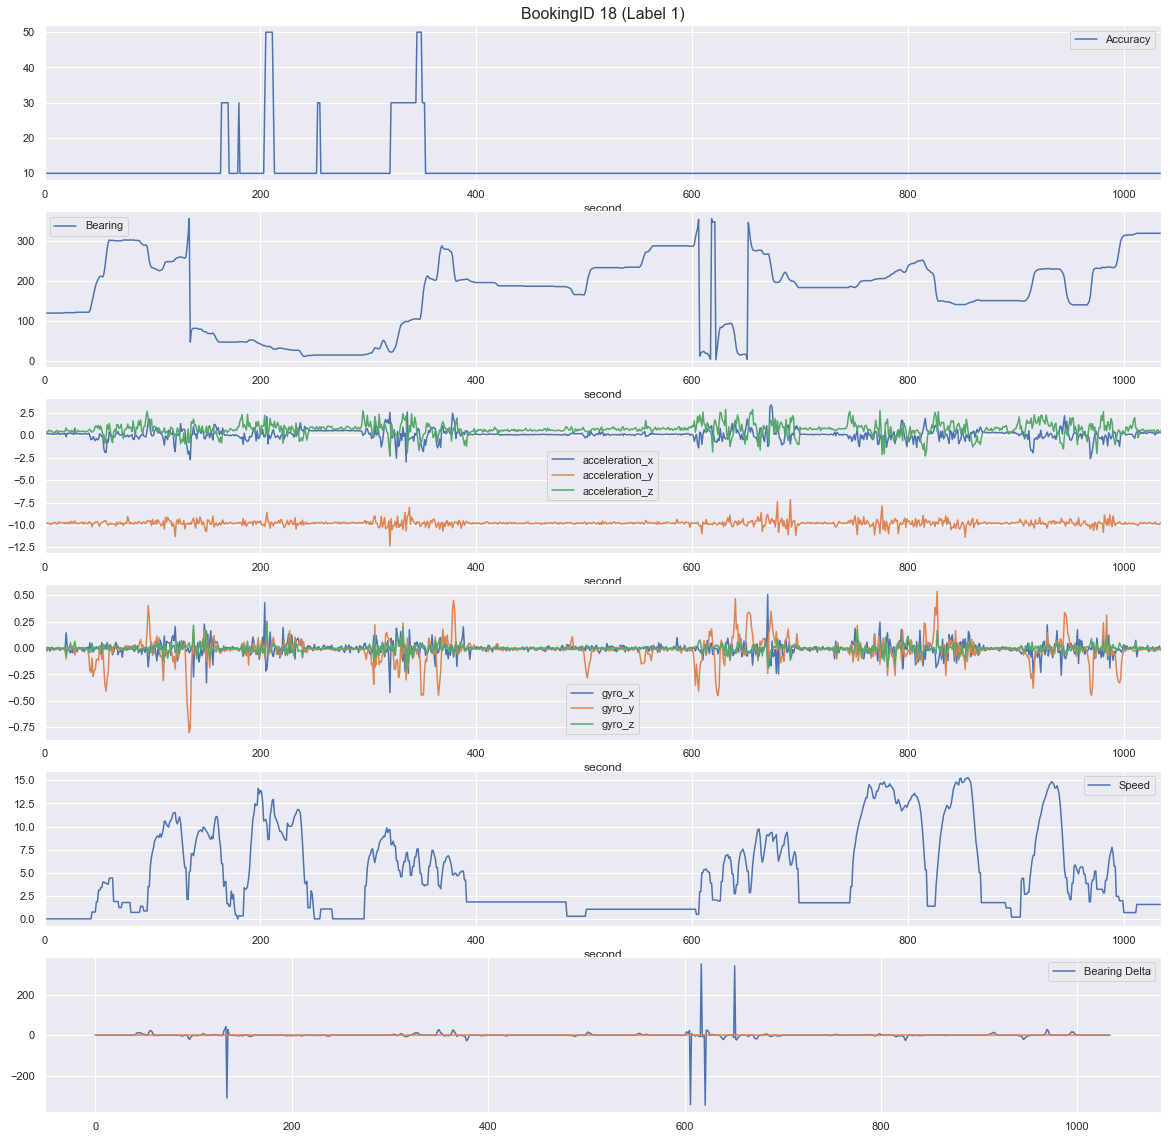

In [13]:
label1 = df_labels[df_labels['label']==1]['bookingID'].tolist() # [1, 2, 4, 18, 35]
for i in label1[2:4]:
    graph_bookingID(i)

In [14]:
def threshold_crosssovers(df, metric, threshold):
    f = np.array(list(df[['second', metric]].itertuples(index=False, name=None)))
    g = [(0, int(threshold))] * len(f)
    idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
    return int(len(idx)/2)

# threshold_crosssovers(df_combined[df_combined['bookingID']==6], 'acceleration_x', 0)

def missing_range(df):
    return int(len(set(df['second']) ^ set(range(0, int(df['second'].iloc[-1])))))

missing_range(df_combined[df_combined['bookingID']==0])
# ID_df = df_combined[df_combined['bookingID']==0]
# ID_df_stats = ID_df.describe()
# ID_df_stats['Accuracy']['min']

588

## Function to convert TimeSeries to Datapoint

In [15]:
def convert_timeseries_to_datapoint(ID):
    col=['ID', 'Accuracy', 'Bearing', 'acceleration_x', 'acceleration_y', 'acceleration_z', 
         'gyro_x', 'gyro_y', 'gyro_z', 'Speed']

    ID_df = df_combined[df_combined['bookingID']==ID]
    ID_df_stats = ID_df.describe()
    
    missing_rng = missing_range(ID_df)
    if missing_rng==0:
        Accuracy = ID_df_stats['Accuracy']['50%']
    else:
        median_idx = int(ID_df['second'].iloc[-1]/2)
        if median_idx in set(ID_df['second']):
            Accuracy = ID_df[ID_df['second']==median_idx]['Accuracy'].iloc[0]
        else:
            Accuracy = ID_df_stats['Accuracy']['min']
    Bearing_delta = np.std(difference(ID_df.loc[:, ['Bearing', 'second']].values))
    acceleration_x = threshold_crosssovers(ID_df, 'acceleration_x', 0) 
    acceleration_y = threshold_crosssovers(ID_df, 'acceleration_y', ID_df_stats['acceleration_y']['mean']) 
    acceleration_z = threshold_crosssovers(ID_df, 'acceleration_z', ID_df_stats['acceleration_z']['mean'])
    gyro_x = ID_df_stats['gyro_x']['max'] - ID_df_stats['gyro_x']['min']
    gyro_y = ID_df_stats['gyro_y']['max'] - ID_df_stats['gyro_y']['min']
    gyro_z = ID_df_stats['gyro_z']['max'] - ID_df_stats['gyro_z']['min']
    Speed = ID_df_stats['Speed']['mean']
    
    return [ID, Accuracy, Bearing_delta, acceleration_x, acceleration_y, acceleration_z, gyro_x, gyro_y, gyro_z, Speed, missing_rng]

In [16]:
df_combined_unique_ids = df_combined['bookingID'].unique().tolist()
print(df_combined_unique_ids)

[0, 1, 2, 4, 6, 7, 8, 10, 11, 14, 16, 17, 18, 21, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 41, 43, 44, 47, 50, 52, 53, 56, 57, 58, 59, 63, 64, 65, 68, 69, 71, 73, 74, 76, 80, 81, 84, 85, 86, 87, 88, 89, 91, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 108, 109, 110, 112, 113, 114, 115, 116, 119, 122, 124, 125, 126, 127, 130, 131, 134, 135, 136, 137, 139, 140, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 162, 163, 168, 171, 172, 8589934594, 8589934595, 8589934597, 8589934598, 8589934599, 8589934600, 8589934603, 8589934604, 8589934606, 8589934607, 8589934608, 8589934609, 8589934611, 8589934612, 8589934613, 8589934614, 8589934615, 8589934617, 8589934618, 8589934620, 8589934622, 8589934624, 8589934625, 8589934626, 8589934627, 8589934628, 8589934629, 8589934630, 8589934631, 8589934632, 8589934633, 8589934634, 8589934635, 8589934636, 8589934637, 8589934638, 8589934639, 8589934641, 8589934642, 8589934644, 8589934647, 8589934648, 858993465

In [17]:
# col=['ID', 'Accuracy', 'Bearing', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 'Speed']
col=['ID', 'Accuracy', 'Bearing_delta', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 'Speed', 'missing_rng']
df_combined.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15876650 entries, 0 to 15876649
Data columns (total 12 columns):
bookingID         int64
Accuracy          float64
Bearing           float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
Speed             float64
label             int64
dtypes: float64(10), int64(2)
memory usage: 1.4 GB


In [46]:
df_datapoints = pd.DataFrame()

for ID in df_combined_unique_ids:
    datapoint = pd.DataFrame(convert_timeseries_to_datapoint(ID), index=col).transpose()
    df_datapoints = pd.concat([df_datapoints, datapoint],ignore_index=True)
    print(df_combined_unique_ids.index(ID))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062


3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702


5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344


6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


7780
7781
7782
7783
7784
7785
7786
7787
7788
7789
7790
7791
7792
7793
7794
7795
7796
7797
7798
7799
7800
7801
7802
7803
7804
7805
7806
7807
7808
7809
7810
7811
7812
7813
7814
7815
7816
7817
7818
7819
7820
7821
7822
7823
7824
7825
7826
7827
7828
7829
7830
7831
7832
7833
7834
7835
7836
7837
7838
7839
7840
7841
7842
7843
7844
7845
7846
7847
7848
7849
7850
7851
7852
7853
7854
7855
7856
7857
7858
7859
7860
7861
7862
7863
7864
7865
7866
7867
7868
7869
7870
7871
7872
7873
7874
7875
7876
7877
7878
7879
7880
7881
7882
7883
7884
7885
7886
7887
7888
7889
7890
7891
7892
7893
7894
7895
7896
7897
7898
7899
7900
7901
7902
7903
7904
7905
7906
7907
7908
7909
7910
7911
7912
7913
7914
7915
7916
7917
7918
7919
7920
7921
7922
7923
7924
7925
7926
7927
7928
7929
7930
7931
7932
7933
7934
7935
7936
7937
7938
7939
7940
7941
7942
7943
7944
7945
7946
7947
7948
7949
7950
7951
7952
7953
7954
7955
7956
7957
7958
7959
7960
7961
7962
7963
7964
7965
7966
7967
7968
7969
7970
7971
7972
7973
7974
7975
7976
7977
7978
7979


9421
9422
9423
9424
9425
9426
9427
9428
9429
9430
9431
9432
9433
9434
9435
9436
9437
9438
9439
9440
9441
9442
9443
9444
9445
9446
9447
9448
9449
9450
9451
9452
9453
9454
9455
9456
9457
9458
9459
9460
9461
9462
9463
9464
9465
9466
9467
9468
9469
9470
9471
9472
9473
9474
9475
9476
9477
9478
9479
9480
9481
9482
9483
9484
9485
9486
9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514
9515
9516
9517
9518
9519
9520
9521
9522
9523
9524
9525
9526
9527
9528
9529
9530
9531
9532
9533
9534
9535
9536
9537
9538
9539
9540
9541
9542
9543
9544
9545
9546
9547
9548
9549
9550
9551
9552
9553
9554
9555
9556
9557
9558
9559
9560
9561
9562
9563
9564
9565
9566
9567
9568
9569
9570
9571
9572
9573
9574
9575
9576
9577
9578
9579
9580
9581
9582
9583
9584
9585
9586
9587
9588
9589
9590
9591
9592
9593
9594
9595
9596
9597
9598
9599
9600
9601
9602
9603
9604
9605
9606
9607
9608
9609
9610
9611
9612
9613
9614
9615
9616
9617
9618
9619
9620


10883
10884
10885
10886
10887
10888
10889
10890
10891
10892
10893
10894
10895
10896
10897
10898
10899
10900
10901
10902
10903
10904
10905
10906
10907
10908
10909
10910
10911
10912
10913
10914
10915
10916
10917
10918
10919
10920
10921
10922
10923
10924
10925
10926
10927
10928
10929
10930
10931
10932
10933
10934
10935
10936
10937
10938
10939
10940
10941
10942
10943
10944
10945
10946
10947
10948
10949
10950
10951
10952
10953
10954
10955
10956
10957
10958
10959
10960
10961
10962
10963
10964
10965
10966
10967
10968
10969
10970
10971
10972
10973
10974
10975
10976
10977
10978
10979
10980
10981
10982
10983
10984
10985
10986
10987
10988
10989
10990
10991
10992
10993
10994
10995
10996
10997
10998
10999
11000
11001
11002
11003
11004
11005
11006
11007
11008
11009
11010
11011
11012
11013
11014
11015
11016
11017
11018
11019
11020
11021
11022
11023
11024
11025
11026
11027
11028
11029
11030
11031
11032
11033
11034
11035
11036
11037
11038
11039
11040
11041
11042
11043
11044
11045
11046
11047
11048
1104

12250
12251
12252
12253
12254
12255
12256
12257
12258
12259
12260
12261
12262
12263
12264
12265
12266
12267
12268
12269
12270
12271
12272
12273
12274
12275
12276
12277
12278
12279
12280
12281
12282
12283
12284
12285
12286
12287
12288
12289
12290
12291
12292
12293
12294
12295
12296
12297
12298
12299
12300
12301
12302
12303
12304
12305
12306
12307
12308
12309
12310
12311
12312
12313
12314
12315
12316
12317
12318
12319
12320
12321
12322
12323
12324
12325
12326
12327
12328
12329
12330
12331
12332
12333
12334
12335
12336
12337
12338
12339
12340
12341
12342
12343
12344
12345
12346
12347
12348
12349
12350
12351
12352
12353
12354
12355
12356
12357
12358
12359
12360
12361
12362
12363
12364
12365
12366
12367
12368
12369
12370
12371
12372
12373
12374
12375
12376
12377
12378
12379
12380
12381
12382
12383
12384
12385
12386
12387
12388
12389
12390
12391
12392
12393
12394
12395
12396
12397
12398
12399
12400
12401
12402
12403
12404
12405
12406
12407
12408
12409
12410
12411
12412
12413
12414
12415
1241

13616
13617
13618
13619
13620
13621
13622
13623
13624
13625
13626
13627
13628
13629
13630
13631
13632
13633
13634
13635
13636
13637
13638
13639
13640
13641
13642
13643
13644
13645
13646
13647
13648
13649
13650
13651
13652
13653
13654
13655
13656
13657
13658
13659
13660
13661
13662
13663
13664
13665
13666
13667
13668
13669
13670
13671
13672
13673
13674
13675
13676
13677
13678
13679
13680
13681
13682
13683
13684
13685
13686
13687
13688
13689
13690
13691
13692
13693
13694
13695
13696
13697
13698
13699
13700
13701
13702
13703
13704
13705
13706
13707
13708
13709
13710
13711
13712
13713
13714
13715
13716
13717
13718
13719
13720
13721
13722
13723
13724
13725
13726
13727
13728
13729
13730
13731
13732
13733
13734
13735
13736
13737
13738
13739
13740
13741
13742
13743
13744
13745
13746
13747
13748
13749
13750
13751
13752
13753
13754
13755
13756
13757
13758
13759
13760
13761
13762
13763
13764
13765
13766
13767
13768
13769
13770
13771
13772
13773
13774
13775
13776
13777
13778
13779
13780
13781
1378

14984
14985
14986
14987
14988
14989
14990
14991
14992
14993
14994
14995
14996
14997
14998
14999
15000
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
15050
15051
15052
15053
15054
15055
15056
15057
15058
15059
15060
15061
15062
15063
15064
15065
15066
15067
15068
15069
15070
15071
15072
15073
15074
15075
15076
15077
15078
15079
15080
15081
15082
15083
15084
15085
15086
15087
15088
15089
15090
15091
15092
15093
15094
15095
15096
15097
15098
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
15109
15110
15111
15112
15113
15114
15115
15116
15117
15118
15119
15120
15121
15122
15123
15124
15125
15126
15127
15128
15129
15130
15131
15132
15133
15134
15135
15136
15137
15138
15139
15140
15141
15142
15143
15144
15145
15146
15147
15148
15149
1515

16350
16351
16352
16353
16354
16355
16356
16357
16358
16359
16360
16361
16362
16363
16364
16365
16366
16367
16368
16369
16370
16371
16372
16373
16374
16375
16376
16377
16378
16379
16380
16381
16382
16383
16384
16385
16386
16387
16388
16389
16390
16391
16392
16393
16394
16395
16396
16397
16398
16399
16400
16401
16402
16403
16404
16405
16406
16407
16408
16409
16410
16411
16412
16413
16414
16415
16416
16417
16418
16419
16420
16421
16422
16423
16424
16425
16426
16427
16428
16429
16430
16431
16432
16433
16434
16435
16436
16437
16438
16439
16440
16441
16442
16443
16444
16445
16446
16447
16448
16449
16450
16451
16452
16453
16454
16455
16456
16457
16458
16459
16460
16461
16462
16463
16464
16465
16466
16467
16468
16469
16470
16471
16472
16473
16474
16475
16476
16477
16478
16479
16480
16481
16482
16483
16484
16485
16486
16487
16488
16489
16490
16491
16492
16493
16494
16495
16496
16497
16498
16499
16500
16501
16502
16503
16504
16505
16506
16507
16508
16509
16510
16511
16512
16513
16514
16515
1651

17717
17718
17719
17720
17721
17722
17723
17724
17725
17726
17727
17728
17729
17730
17731
17732
17733
17734
17735
17736
17737
17738
17739
17740
17741
17742
17743
17744
17745
17746
17747
17748
17749
17750
17751
17752
17753
17754
17755
17756
17757
17758
17759
17760
17761
17762
17763
17764
17765
17766
17767
17768
17769
17770
17771
17772
17773
17774
17775
17776
17777
17778
17779
17780
17781
17782
17783
17784
17785
17786
17787
17788
17789
17790
17791
17792
17793
17794
17795
17796
17797
17798
17799
17800
17801
17802
17803
17804
17805
17806
17807
17808
17809
17810
17811
17812
17813
17814
17815
17816
17817
17818
17819
17820
17821
17822
17823
17824
17825
17826
17827
17828
17829
17830
17831
17832
17833
17834
17835
17836
17837
17838
17839
17840
17841
17842
17843
17844
17845
17846
17847
17848
17849
17850
17851
17852
17853
17854
17855
17856
17857
17858
17859
17860
17861
17862
17863
17864
17865
17866
17867
17868
17869
17870
17871
17872
17873
17874
17875
17876
17877
17878
17879
17880
17881
17882
1788

19083
19084
19085
19086
19087
19088
19089
19090
19091
19092
19093
19094
19095
19096
19097
19098
19099
19100
19101
19102
19103
19104
19105
19106
19107
19108
19109
19110
19111
19112
19113
19114
19115
19116
19117
19118
19119
19120
19121
19122
19123
19124
19125
19126
19127
19128
19129
19130
19131
19132
19133
19134
19135
19136
19137
19138
19139
19140
19141
19142
19143
19144
19145
19146
19147
19148
19149
19150
19151
19152
19153
19154
19155
19156
19157
19158
19159
19160
19161
19162
19163
19164
19165
19166
19167
19168
19169
19170
19171
19172
19173
19174
19175
19176
19177
19178
19179
19180
19181
19182
19183
19184
19185
19186
19187
19188
19189
19190
19191
19192
19193
19194
19195
19196
19197
19198
19199
19200
19201
19202
19203
19204
19205
19206
19207
19208
19209
19210
19211
19212
19213
19214
19215
19216
19217
19218
19219
19220
19221
19222
19223
19224
19225
19226
19227
19228
19229
19230
19231
19232
19233
19234
19235
19236
19237
19238
19239
19240
19241
19242
19243
19244
19245
19246
19247
19248
1924

In [47]:
df_datapoints['ID'] = df_datapoints['ID'].astype('int64')
df_datapoints.head()

,ID,Accuracy,Bearing_delta,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Speed,missing_rng
0,0,4.000,24.884408,840.0,881.0,762.0,0.830909,1.079655,1.104699,9.004787,588.0
1,1,3.474,9.901822,739.0,105.0,537.0,0.251903,1.149020,0.356396,8.019369,198.0
2,2,3.000,40.149162,58.0,9.0,69.0,0.437380,0.893696,0.381791,3.157213,632.0
3,4,10.000,18.359159,921.0,957.0,908.0,0.859239,1.159158,0.853409,6.150996,2.0
4,6,4.050,18.636297,210.0,181.0,306.0,0.615752,1.153924,0.712880,4.628921,1.0


In [48]:
df_datapoints.to_csv(r'safety/engineered_features.csv', index=False)

In [52]:
df_datapoints.shape

(19955, 11)

## Removing illogical datapoints/outliers

In [46]:
# Find and remove Nan (beacuse bookingID only has 1 row and is not timeseries data)
df_datapoints = pd.read_csv('safety/engineered_features.csv')

engineered_values_array = df_datapoints[col].values
print(np.where(np.isnan(engineered_values_array)))

display(engineered_values_array[7780])
nan_datapoint = df_combined[df_combined['bookingID']==609885356187]
display(nan_datapoint)

(array([7780], dtype=int64), array([2], dtype=int64))


array([6.09885356e+11, 1.20000000e+01,            nan, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.23437738e+00, 1.00000000e+00])

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
6156958,609885356187,12.0,177.315491,-0.32883,-10.068567,0.213986,0.01678,0.053168,-0.027809,0.0,6.234377,0


In [47]:
df_combined = df_combined.drop(nan_datapoint.index, axis=0).sort_values(['bookingID', 'second']).reset_index(drop=True)
print(df_combined.shape)

(15876649, 12)


In [48]:
nan_datapoint = df_features[df_features['bookingID']==609885356187]
display(nan_datapoint)
df_features = df_features.drop(nan_datapoint.index, axis=0).sort_values(['bookingID']).reset_index(drop=True)

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
6156958,609885356187,12.0,177.315491,-0.32883,-10.068567,0.213986,0.01678,0.053168,-0.027809,0.0,6.234377


In [49]:
nan_datapoint = df_labels[df_labels['bookingID']==609885356187]
display(nan_datapoint)
df_labels = df_labels.drop(nan_datapoint.index, axis=0).sort_values(['bookingID']).reset_index(drop=True)

,bookingID,label
7780,609885356187,0


In [53]:
nan_datapoint = df_datapoints[df_datapoints['ID']==609885356187]
display(nan_datapoint)
df_datapoints = df_datapoints.drop(nan_datapoint.index, axis=0).sort_values(['ID']).reset_index(drop=True)


,ID,Accuracy,Bearing_delta,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Speed,missing_rng
7780,609885356187,12.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,6.234377,1.0


# Save Engineered Features & Further Cleaned Data

In [50]:
df_datapoints.to_csv(r'safety/engineered_features.csv', index=False)
df_labels.to_csv(r'safety/data_cleaned_labels.csv', index=False)
df_features.to_csv(r'safety/data_cleaned_features.csv', index=False)
df_combined.to_csv(r'safety/data_cleaned_combined.csv', index=False)

In [54]:
df_datapoints_mean = pd.read_csv('safety/engineered_features_mean.csv')
df_datapoints_mean.head()

,ID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Speed
0,0,10.165339,176.526099,-0.711264,-9.613822,-1.619658,0.003328,-0.006118,-0.004188,8.994822
1,1,3.718763,124.198590,-0.525406,9.532086,-2.198999,-0.002467,-0.007540,0.000405,7.881588
2,2,3.930626,173.794872,0.306786,9.843183,0.139347,0.006458,-0.012861,0.002597,3.157213
3,4,10.000000,151.807013,-0.365117,-9.406439,-2.613639,-0.022884,0.023232,-0.000376,6.150996
4,6,4.586721,197.812785,0.490616,9.538043,2.355059,0.003877,0.000436,0.002930,4.628921


# Correlation of Engineered Features 
(Mean vs Revised Engineered Features)

In [55]:
df_datapoints_mean.corr()

,ID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Speed
ID,1.000000,-0.008585,0.000002,-0.002446,0.005173,0.012468,0.019185,0.008346,0.007704,-0.005918
Accuracy,-0.008585,1.000000,0.001852,-0.005867,-0.202632,-0.124991,-0.028809,0.004701,0.002945,-0.042199
Bearing,0.000002,0.001852,1.000000,-0.002273,-0.115591,-0.078864,-0.005167,-0.005199,-0.017883,0.114019
acceleration_x,-0.002446,-0.005867,-0.002273,1.000000,0.068639,0.017283,-0.004182,0.001015,0.007371,0.005385
acceleration_y,0.005173,-0.202632,-0.115591,0.068639,1.000000,0.397915,0.146940,-0.011110,0.009119,-0.003769
acceleration_z,0.012468,-0.124991,-0.078864,0.017283,0.397915,1.000000,0.101053,-0.014705,-0.005283,-0.014670
gyro_x,0.019185,-0.028809,-0.005167,-0.004182,0.146940,0.101053,1.000000,0.075089,-0.002318,-0.014464
gyro_y,0.008346,0.004701,-0.005199,0.001015,-0.011110,-0.014705,0.075089,1.000000,-0.026358,0.007830
gyro_z,0.007704,0.002945,-0.017883,0.007371,0.009119,-0.005283,-0.002318,-0.026358,1.000000,0.007403
Speed,-0.005918,-0.042199,0.114019,0.005385,-0.003769,-0.014670,-0.014464,0.007830,0.007403,1.000000


Text(0.5, 1.0, 'Correlation of Label with mean value of Features')

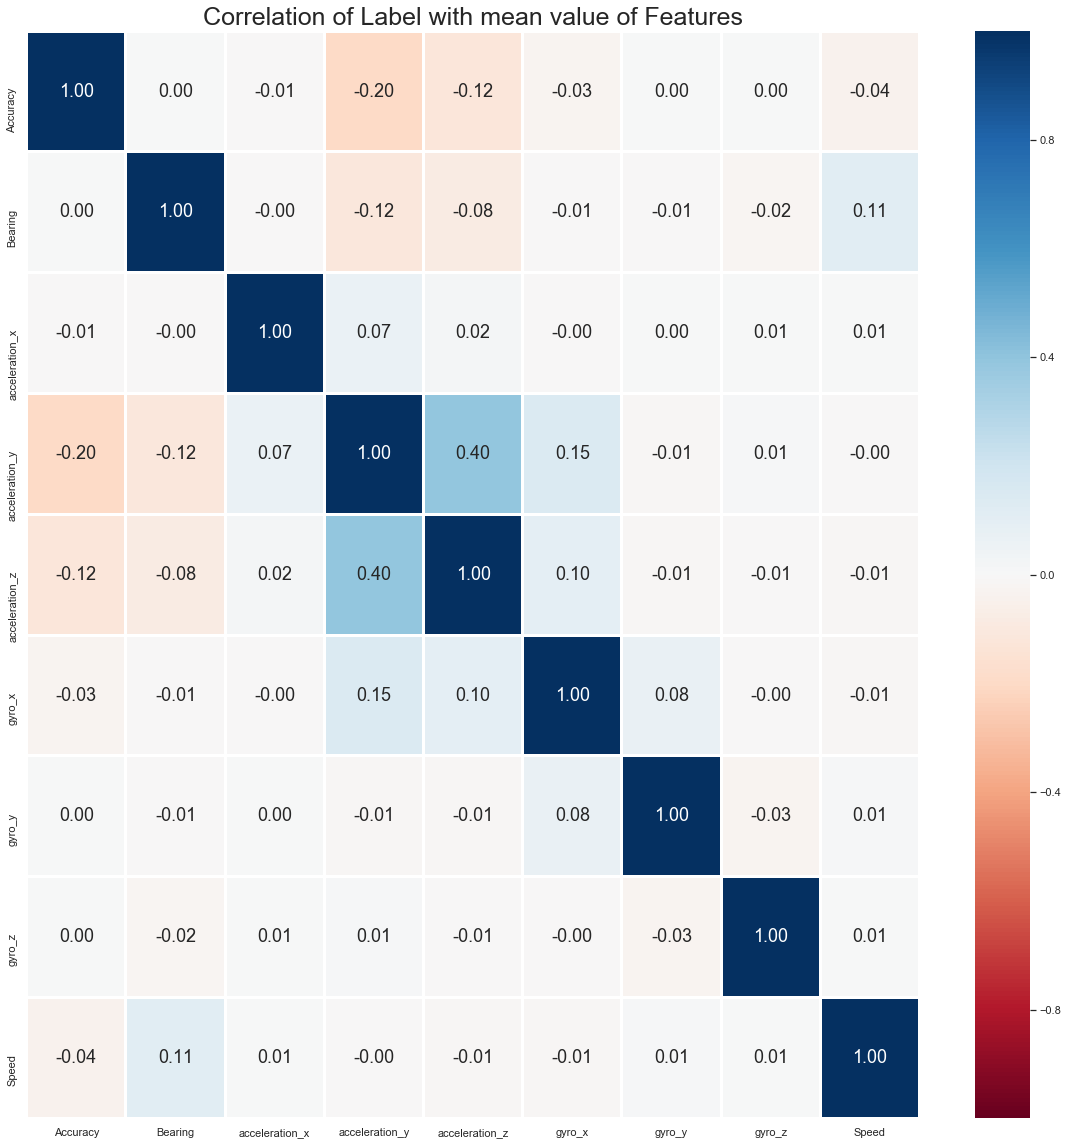

In [56]:
f, axes = plt.subplots(1,1,figsize=(20,20))
sb.heatmap(df_datapoints_mean.drop('ID', axis=1).corr(), vmin=-1, vmax=1, linewidths=2,
          annot=True, fmt=".2f", annot_kws={"size":18}, cmap="RdBu")
axes.set_title("Correlation of Label with mean value of Features", fontsize=25)

In [57]:
# df_datapoints = pd.read_csv('safety/engineered_features.csv')
df_datapoints.head()

,ID,Accuracy,Bearing_delta,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Speed,missing_rng
0,0,4.000,24.884408,840.0,881.0,762.0,0.830909,1.079655,1.104699,9.004787,588.0
1,1,3.474,9.901822,739.0,105.0,537.0,0.251903,1.149020,0.356396,8.019369,198.0
2,2,3.000,40.149162,58.0,9.0,69.0,0.437380,0.893696,0.381791,3.157213,632.0
3,4,10.000,18.359159,921.0,957.0,908.0,0.859239,1.159158,0.853409,6.150996,2.0
4,6,4.050,18.636297,210.0,181.0,306.0,0.615752,1.153924,0.712880,4.628921,1.0


In [60]:
df_datapoints['label'] = df_labels['label']

In [61]:
df_datapoints.corr()

,ID,Accuracy,Bearing_delta,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Speed,missing_rng,label
ID,1.000000,0.008255,0.011731,0.005002,0.002891,-0.003329,0.020214,0.008892,0.015968,-0.006172,-0.000983,0.036886
Accuracy,0.008255,1.000000,-0.025674,0.030185,0.232433,0.087793,0.016724,-0.021159,0.006633,-0.002309,-0.025415,0.006451
Bearing_delta,0.011731,-0.025674,1.000000,-0.079887,-0.177281,-0.114655,0.107258,0.112978,0.131317,-0.287787,0.214744,0.110848
acceleration_x,0.005002,0.030185,-0.079887,1.000000,0.394842,0.449913,0.105475,0.052603,0.072150,0.167715,0.036812,0.149660
acceleration_y,0.002891,0.232433,-0.177281,0.394842,1.000000,0.515085,0.127016,0.001399,0.060549,0.158436,0.019165,0.110980
acceleration_z,-0.003329,0.087793,-0.114655,0.449913,0.515085,1.000000,0.114682,0.033032,0.048000,0.175900,0.034505,0.150488
gyro_x,0.020214,0.016724,0.107258,0.105475,0.127016,0.114682,1.000000,0.497124,0.722535,-0.068601,0.114658,0.142500
gyro_y,0.008892,-0.021159,0.112978,0.052603,0.001399,0.033032,0.497124,1.000000,0.626699,-0.018450,0.061154,0.077015
gyro_z,0.015968,0.006633,0.131317,0.072150,0.060549,0.048000,0.722535,0.626699,1.000000,-0.056309,0.098301,0.116456
Speed,-0.006172,-0.002309,-0.287787,0.167715,0.158436,0.175900,-0.068601,-0.018450,-0.056309,1.000000,-0.008030,-0.066942


Text(0.5, 1.0, 'Correlation of Label with Engineered Features')

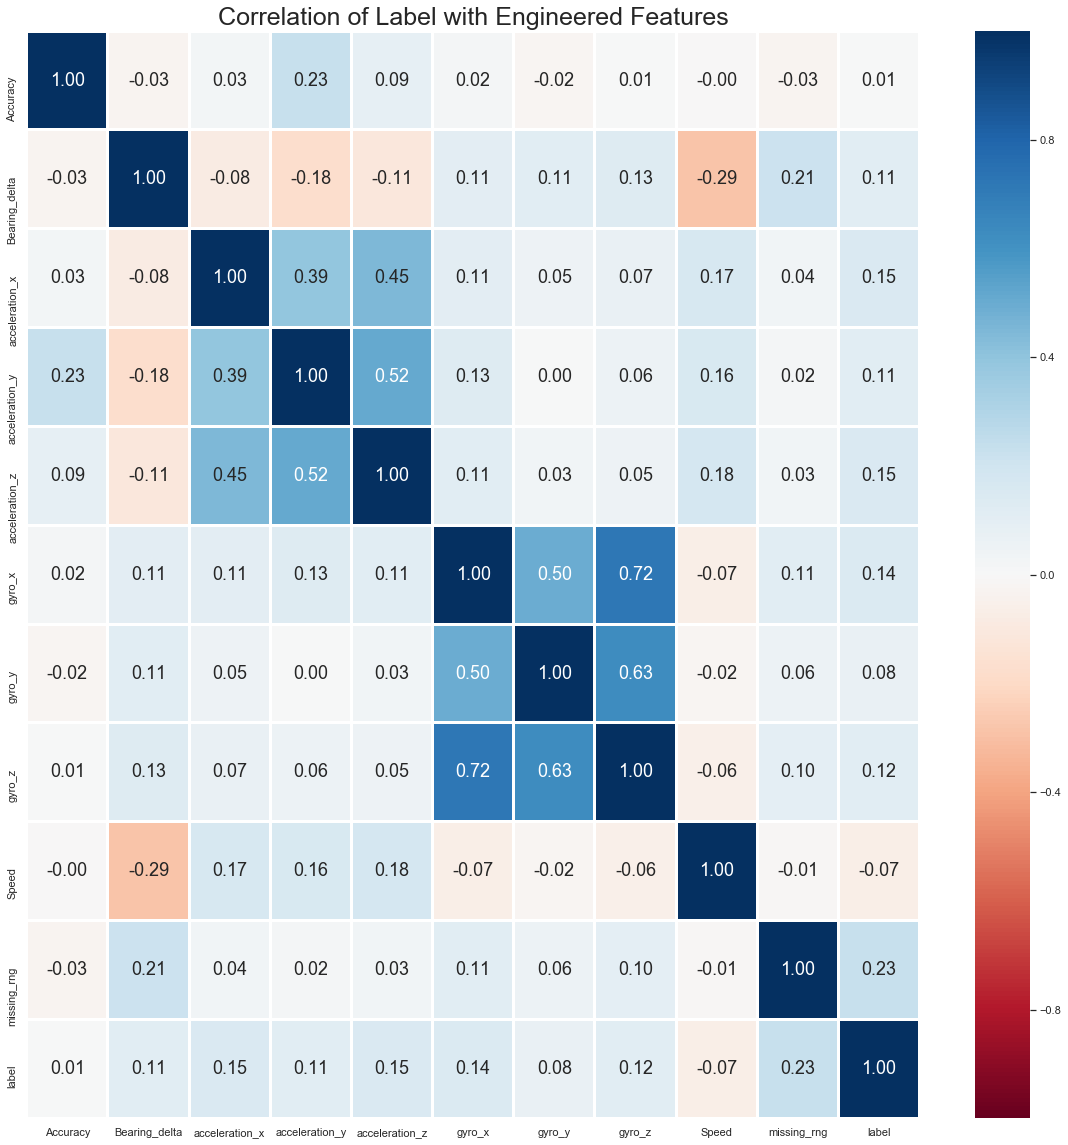

In [62]:
f, axes = plt.subplots(1,1,figsize=(20,20))
sb.heatmap(df_datapoints.drop('ID', axis=1).corr(), vmin=-1, vmax=1, linewidths=2,
          annot=True, fmt=".2f", annot_kws={"size":18}, cmap="RdBu")
axes.set_title("Correlation of Label with Engineered Features", fontsize=25)